 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Inheritance
- Polymorphism
- Abstraction


## ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
# dont do it this way anymore
# class Car():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model
        
#     def __repr__(self):
#         return F"this is a {self.make} {self.model}"
        
# honda = Car("Honda", "Civic")

# print(honda.make)
# print(honda)

# honda.make = "chevy"

# class Truck():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model




In [ ]:

class Test_Video():
    def __init__(self):
        self.title = None
        self.runtime = None
        self.language = None
        self.cast = []
        self.genres = []
        self.desciption = None
        self.captions = False
        self.ratings = None
    def add
    
    def __repr__(self):
        return (f'The self ratings are {self.ratings}')
        
        
my_episode = Video()

print(my_episode.title) # no no
        
my_episode.title = "My first day" # also no no


In [22]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'
class Video():
    
    generic_image = 'codeflix.png'

    def __init__(self):
        self.title =None
        self.length = timedelta()
        self.link = generic_image
    def play(self):
        print(f'now playing: {self.title}')
        display(Image(url = self.link))
    
    def __len__(self):
        return self.length
    
    def __repr__(self):
        return(f"{self.title} is {self.length.seconds} seconds long")
        

## INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [23]:
#Episode class that inherits from the video class
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Episode(Video):

        def __init__(self, data):
            Video.__init__(self)
            self.numer = data["number"]
            self.season = data["season"]
            self.date_aired = data["airdate"]
            self.summary = data["summary"]
            self.rating = data["rating"]["average"]
            self.title = data ["name"]
            self.length = timedelta (minutes = data["runtime"])
            if data ["image"]:
                self.link = data["image"]["medium"]
                



## POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [19]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query=''):
        data = None #the show we're looking for doesnt exist
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                
            r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series Error: {r.status_code}")
                
#         Data to alter class attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
            
#         api call for episodes using the id from the series which is self.id
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json() # list of episode dictionaries that comes back from https://api.tvmaze.com/shows/216/episodes
            self.seasons = episodes[-1]['season']
            self.episodes = [Episode(ep) for ep in episodes] #each episode dictionary becomes the data we're passing into an Episode instance
            print(f"{self.title} has {len(self.episodes)} episodes")
        else:
            print(f"Print Episode Error: status_code {r.status_code}")
            
    
    
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ("yes", "y", "yeah", "ye", "affirmative", "si", "indeed"):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"   


In [24]:
my_show = Series()

my_show.get_info("Scrubs")

Scrubs has 182 episodes


In [25]:
my_show.watch()

now playing: My First Day


now playing: My Mentor


now playing: My Best Friend's Mistake


Are you still watching? also get a job y/ny
now playing: My Old Lady


now playing: My Two Dads


now playing: My Bad


Are you still watching? also get a job y/nn


In [33]:
class User:
    __id_counter = 1 #class attribute
    def __init__(self, username, password):
        self.username = username
        self.password = password[::-2]
        self.id = User.__id_counter
        User.__id_counter += 1
        self.watch_list = []
        
    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        
        return formatted_user
    
    def __repr__(self):
        return f"<User {self.id} | {self.username}>"
    
    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

## ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>

In [38]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theater():
    def __init__(self):
        self.users = set()
        self.current_user = None
        
    # adding a user to self.users
    def add_user(self):
        username = input("Please enter a username: ")
        
        if username in {u.username for u in self.users}:
            print('User with that name already exists. Please try again!')
        else:
            password = input("Please enter your password: ")
            user = User(username, password)
            self.users.add(user)
            print(f"{user} has been created!!!")
            
        self.login_user()
        
#     login user 
    def login_user(self):
        username = input("What is your username? ")
        password = input("What is your password? ")
        
        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f"{user} has logged in!")
                break
        else:
            print("Username and/or password is incorrect!")
            
#     logout user
    def logout(self):
        self.current_user = None
        print("You have succesfully been logged out!")
        
#     update user
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username ")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Please enter the updated password or enter skip to keep current password")
            if new_pw != "skip":
                self.current_user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update your information")
            self.login_user()
            
# ---------------------------------------------------------------------------------------------------------------
# watchlist section

# add to watch list
    def add_to_watchlist(self, query=""):
        if self.current_user:
            show = Series()
            show.get_info(query)
            self.current_user.watch_list.append(show)
            
            print(f"{show.title} has been added to the watchlist!")
        
        else: 
            print("please sign in to add to your watchlist")
            self.login_user()
            
    # view watchlist
    def view_watch_list(self):
        if self.current_user:
            for series in self.current_user.watch_list:
                print(f"\n\n{series} | Episodes: {(len(series))}")
                print(f"\nSummary: \n {series.summary}")
                display(Image(series.episodes[0].link))
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
            
#     remove from watchlist
    def delete(self):
        if self.current_user:
            print("Your current watchlist: ")
            self.view_watch_list()
            
            response = input("What would you like to remove from your watch list? ")
            
            for series in self.current_user.watch_list:
                if series.title.title() == response.title():
                    self.current_user.watch_list.remove(series)
                    print(f"{response.title()} has been removed from your watch list!")
                    break
            else:
                print("That title is not in your watch list! You GOON!") # 404 error
                
            self.view_watch_list()
            
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
        
            
            
    def choose_from_watch_list(self):
        if self.current_user:
            self.view_watch_list()
            
            watch = input("What would you like to watch? ")
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
                    break
            else:
                response = input(f"{watch} is not in your watch list... would you like to add it? y/n")
                if response in ("yes", 'y'):
                    self.add_to_watchlist(watch)
                    
                    print("..........")
                    sleep(2)
                    print("...............")
                    self.current_user.watch_list[-1].watch()
                    
        else:
            print("please sign in to add to your watchlist")
            self.login_user()
            
            
    
#     runnnnn itttttt
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(url=generic_image))
        
        if self.users:
            self.login_user()
        else:
            self.add_user()
            
            print("""
            What would you like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - Logout of your profile
            Search - search for shows
            Watch - pick something from your watchlist
            View - view your watchlist
            Delete - delete from watch list
            Quit - close the application            
            
            """)
            
        while True:
            response = input("What would you like to do? (add, update, login, search, watch, view, delete, quit?) ").lower()
            
            if response == "search":
                self.add_to_watchlist()
            elif response == "watch":
                self.choose_from_watch_list()
            elif response == "add":
                self.add_user()
            elif response == "logout":
                self.logout()
                new_response = input("What would you like to do next? login, add, quit").lower()
                if new_response == "add":
                    self.add_user()
                elif new_response == "login":
                    self.login_user()
                elif new_response == "quit":
                    print("Thanks for watching!")
                    break
                    
                else:
                    print("Please enter a valid response and try again!")
                    
            elif response == "login":
                self.login_user()
                
            elif response == "update":
                self.update_user()
                
            elif response == "view":
                self.view_watch_list()
                
            elif response == "delete":
                self.delete()
                
            elif response == "quit":
                print(f"Thanks for watching {self.current_user.username}! Now go outside and touch some grass!")
                break
            else:
                print("Please enter a valid input and try again!")



In [39]:
codeflix = Theater()

Please enter a username: g
Please enter your password: oiyve

        1 - G
        pw: eyo
         has been created!!!
What is your username? g
What is your password? oiyve

        1 - G
        pw: eyo
         has logged in!

            What would you like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - Logout of your profile
            Search - search for shows
            Watch - pick something from your watchlist
            View - view your watchlist
            Delete - delete from watch list
            Quit - close the application            
            
            
What would you like to do? (add, update, login, search, watch, view, delete, quit?) add
Please enter a username: g
User with that name already exists. Please try again!
What is your username? grace
What is your password? o
Username and/or password is incorrect!
What would you like to do? (add, update, login, s

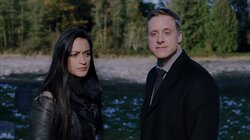

What would you like to watch? 1
1 is not in your watch list... would you like to add it? y/nn
What would you like to do? (add, update, login, search, watch, view, delete, quit?) watch


Title: Resident Alien | Episodes: 34

Summary: 
 None


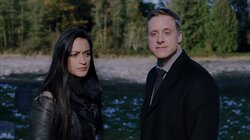

What would you like to watch? resident alien
now playing: Pilot


now playing: Homesick


now playing: Secrets


Are you still watching? also get a job y/nn
What would you like to do? (add, update, login, search, watch, view, delete, quit?) view


Title: Resident Alien | Episodes: 34

Summary: 
 None


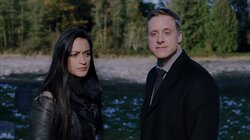

What would you like to do? (add, update, login, search, watch, view, delete, quit?) delete
Your current watchlist: 


Title: Resident Alien | Episodes: 34

Summary: 
 None


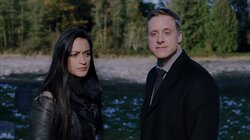

What would you like to remove from your watch list? resident alien
Resident Alien has been removed from your watch list!
What would you like to do? (add, update, login, search, watch, view, delete, quit?) quit
Thanks for watching g! Now go outside and touch some grass!


In [40]:
codeflix.run()

## Exercise 1

<p>Describe in your own words the following concepts and give an analogy tying to a real-world concept.

#### Difference between a Class and an Object

#### Encapsulation

#### Inheritance

#### Polymorphism

#### Abstraction

##  Exercise 2 (Optional):
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads. Make sure you either write out your thoughts in the below cell  or comment where you added code to the above Classes.